In [1]:
import cv2
import numpy as np
#from shapeDetector import ShapeDetector
import imutils
from matplotlib import pyplot as plt

image0=cv2.imread("body/panel-prospective.jpg")
image = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)

color=(36,255,12)
thickness=2

In [2]:
#FILTERING
if 1:
    image = cv2.GaussianBlur(image, (3, 3), 0)


In [3]:
#BINARIZATION

if 0:
    binariz = cv2.Canny(image, 120, 255, 1)
else:
    _,binariz = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # NOT WORKING


In [21]:
if 1:
    kernel = np.ones((30,30),np.uint8)
else:
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( 7, 7) )   
# OPENING= DILATE+ERODE
# CLOSING= ERODE+DILATE  or was the opposite

if 0:
    image = cv2.erode(image,kernel,iterations = 10)
    image = cv2.dilate(image,kernel,iterations = 10)
else:
    imgrect = cv2.morphologyEx( image, cv2.MORPH_CLOSE, kernel )

In [5]:
# CONTOURS
cnts = cv2.findContours(binariz, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#implement the better funtion to pick cnts wrt py version
#cnts=imutils.xyz(cnts)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [ ]:
# CHERRYPICKING

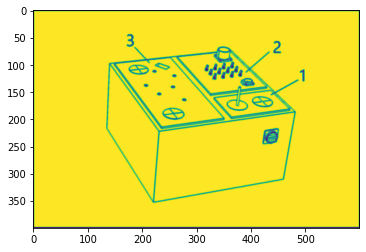

In [7]:
# DRAWING
if 0:
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x,y), (x+w,y+h), color, thickness)
        # "WORKING"
else:
    for c in cnts:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING
        
plt.imshow(image)
plt.show()

In [2]:
# taking biggest contour and minarearect
max_contour = max(cnts, key=len)
rect = cv2.minAreaRect(max_contour)
#if self.verifySizes(rect):
    #...
    #rect.append(...verifyed) 
poly = cv2.boxPoints(rect)
#cx, cy = rect[0]
#w, h = rect[1]
#theta = rect[2]
#box[idx, :] = [cx, cy, w, h, theta]
#box = np.asarray(box, dtype = xs.dtype)

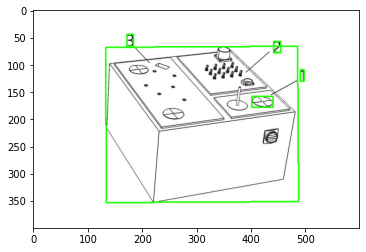

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image=cv2.imread("body/panel-prospective.jpg")
#print(image.shape)
color=(36,255,12)
thickness=2

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
if 1:
    canny = cv2.Canny(blurred, 120, 255, 1)
else:
    ret,canny = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # NOT WORKING
    
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#print(cnts)
# Iterate thorugh contours and draw rectangles around contours
if 0:
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x,y), (x+w,y+h), color, thickness)
        # "WORKING"
else:
    for c in cnts:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING
        
plt.imshow(image)
plt.show()

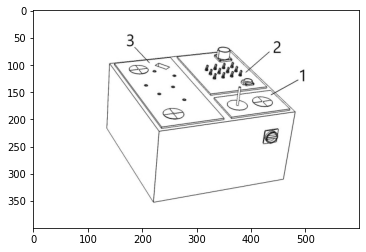

In [1]:
import cv2
import numpy as np
#from shapeDetector import ShapeDetector
import imutils
from matplotlib import pyplot as plt

image=cv2.imread("body/panel-prospective.jpg")
if 1:
    kernel = np.ones((30,30),np.uint8)
else:
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( 7, 7) )   

if 0:
    image = cv2.erode(image,kernel,iterations = 10)
    image = cv2.dilate(image,kernel,iterations = 10)
else:
    imgrect = cv2.morphologyEx( image, cv2.MORPH_CLOSE, kernel )
    
plt.imshow(image)
plt.show()

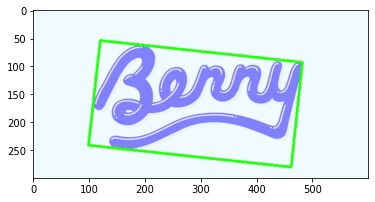

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image, convert to grayscale, Otsu's threshold for binary image
image = cv2.imread("body/commercial.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
if 0:
    
else:
    rect = cv2.minAreaRect(cnts[0])
    box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], 0, (36,255,12), 3) # OR
# cv2.polylines(image, [box], True, (36,255,12), 3)

plt.imshow(image)
plt.show()